<a href="https://colab.research.google.com/github/saffarizadeh/INSY4054/blob/main/Python_Basics_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *INSY 4054: Emerging Technologies*

# **Python Basics III**

Instructor: Dr. Kambiz Saffarizadeh

---

Most of the credit for this notebook goes to McIntire et al.: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

Also Pandas contributors: https://github.com/pandas-dev/pandas/graphs/contributors

#Numpy

`numpy` is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this tutorial useful to get started with Numpy.

## Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
import numpy as np

In [ ]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"

In [ ]:
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

In [ ]:
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b)
print(b.shape)                     # Prints "(2, 3)"

In [ ]:
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

### Array indexing
Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

Create the following rank 2 array with shape (3, 4)

[[ 1  2  3  4]

 [ 5  6  7  8]
 
 [ 9 10 11 12]]

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

Use slicing to pull out the subarray consisting of the first 2 rows and columns 1 and 2; b is the following array of shape (2, 2):

[[2 3]

 [6 7]]

In [ ]:
b = a[:2, 1:3]

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])   # Prints "2"

In [ ]:
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]

In [ ]:
print(a[0, 1])   # Prints "77"

You can select a single row or column of an array too:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
print(row_r1)

In [ ]:
col_r1 = a[:, 2]    # Rank 1 view of the third column of a
print(col_r1)

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

In [ ]:
bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.
print(bool_idx)

We use boolean array indexing to construct a rank 1 array consisting of the elements of a corresponding to the True values of bool_idx

In [ ]:
print(a[bool_idx])

We can do all of the above in a single concise statement:

In [ ]:
print(a[a > 2])     # Prints "[3 4 5 6]"

### Numpy Datatypes
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)

You can read all about numpy datatypes in the <a href="http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html" target="_blank">documentation</a>.

# Pandas

In [1]:
import numpy as np
import pandas as pd

## Core components of pandas: Series and DataFrames

The primary two components of pandas are the Series and DataFrame.

A Series is essentially a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.

<img src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png" width=50%>

### Creating columns (Series) from scratch

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

Creating Series of dates:

In [ ]:
dates = pd.date_range('20210101', periods=6)
dates

Creating a categorical column:

In [ ]:
test_train = pd.Categorical(["test", "train", "test", "train", "train", "train"])

### Creating DataFrames from Columns

In [ ]:
table_dict = {'Date': dates, 'Type_of_Learning': test_train, 'Value': s}

In [ ]:
df1 = pd.DataFrame(table_dict)
df1

### Creating DataFrames from scratch

There are many ways to create a DataFrame from scratch, but a great option is to just use a simple dict.

In [ ]:
data = {
        'apples': [3, 2, 0, 1], 
        'oranges': [0, 3, 7, 2]
        }

In [ ]:
purchases = pd.DataFrame(data)

In [ ]:
purchases

How did that work?

Each (key, value) item in data corresponds to a column in the resulting DataFrame.

The Index of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame.

Let's have customer names as our index:

In [ ]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

So now we could locate a customer's order by using their name:

In [ ]:
purchases.loc['June']

## How to read in data

### Reading data from CSVs

In [2]:
df2 = pd.read_csv('http://saffarizadeh.com/ET/purchases.csv')

In [ ]:
df2

CSVs don't have indexes like our DataFrames, so all we need to do is just designate the `index_col` when reading:

In [ ]:
df2 = pd.read_csv('http://saffarizadeh.com/ET/purchases.csv', index_col=0)

df2

### Reading data from JSON

If you have a JSON file — which is essentially a stored Python `dict` — pandas can read this just as easily:

In [ ]:
df3 = pd.read_json('http://saffarizadeh.com/ET/purchases.json')

In [ ]:
df3

Notice this time our index came with us correctly since using JSON allowed indexes to work through nesting. Feel free to open `purchases.json` in a notepad so you can see how it works.

### Converting back to a CSV or JSON

So after extensive work on cleaning your data, you’re now ready to save it as a file of your choice. Similar to the ways we read in data, pandas provides intuitive commands to save it:

In [ ]:
df2['apples'][0] = 999
df2.to_csv('new_purchases.csv')

In [ ]:
df3.to_json('new_purchases.json')

# Let's work with some real data! [Warm up for Module 3]

In [ ]:
movies_df = pd.read_csv("http://saffarizadeh.com/ET/IMDB-Movie-Data.csv", index_col="Title")

### Viewing your data

The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with `.head()`:

In [ ]:
movies_df.head()

`.head()` outputs the **first** five rows of your DataFrame by default, but we could also pass a number as well: `movies_df.head(10)` would output the top ten rows, for example. 

To see the **last** five rows use `.tail()`. `tail()` also accepts a number, and in this case we printing the bottom two rows.:

In [ ]:
movies_df.tail(2)

describe() shows a quick statistic summary of your data:

### Getting info about your data

`.info()` should be one of the very first commands you run after loading your data:

In [ ]:
movies_df.info()

`.info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using.

In [ ]:
movies_df.shape

### Understanding your variables

Display the index, columns:

In [ ]:
movies_df.index

In [ ]:
movies_df.columns

Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [ ]:
movies_df.describe()

`.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

### DataFrame slicing, selecting, extracting

#### By column

You already saw how to extract a column using square brackets like this:

Selecting a single column, which yields a Series, equivalent to `df.Genre`:

In [ ]:
genre_col = movies_df['Genre'] # Or you can use: movies_df.Genre

type(genre_col)

This will return a *Series*. To extract a column as a *DataFrame*, you need to pass a list of column names. In our case that's just a single column:

In [ ]:
genre_col = movies_df[['Genre']]

type(genre_col)

Since it's just a list, adding another column name is easy:

In [ ]:
subset = movies_df[['Genre', 'Rating']]

subset.head()

Now we'll look at getting data by rows.

#### By rows

We can slice the rows by selecting via `[]`:

In [ ]:
movies_df[0:3]

For rows, we have two more options: 

- `.loc` - **loc**ates by name (Selection by Label)
- `.iloc`- **loc**ates by numerical **i**ndex (Selection by Position)

Remember that we are still indexed by movie Title, so to use `.loc` we give it the Title of a movie:

In [ ]:
prom = movies_df.loc["Prometheus"]

prom

On the other hand, with `iloc` we give it the numerical index of Prometheus:

In [ ]:
prom = movies_df.iloc[1]

`loc` and `iloc` can be thought of as similar to Python `list` slicing. To show this even further, let's select multiple rows.

How would you do it with a list? In Python, just slice with brackets like `example_list[1:4]`. It's works the same way in pandas:

In [ ]:
movie_subset = movies_df.loc['Prometheus':'Sing']

movie_subset

In [ ]:
movie_subset = movies_df.iloc[1:4]

movie_subset

One important distinction between using `.loc` and `.iloc` to select multiple rows is that `.loc` includes the movie *Sing* in the result, but when using `.iloc` we're getting rows 1:4 but the movie at index 4 (*Suicide Squad*) is not included. 

Slicing with `.iloc` follows the same rules as slicing with lists, the object at the index at the end is not included.

#### Conditional selections (Boolean Indexing)
We’ve gone over how to select columns and rows, but what if we want to make a conditional selection? 

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [ ]:
condition = (movies_df['Director'] == "Ridley Scott")

condition.head()

This returns a Series of True and False values: True for films directed by Ridley Scott and False for ones not directed by him. 

In [ ]:
movies_df[movies_df['Director'] == "Ridley Scott"].head() # Or movies_df[condition]

You can get used to looking at these conditionals by reading it like: 

> Select movies_df where movies_df director equals Ridley Scott

Let's look at conditional selections using numerical values by filtering the DataFrame by ratings:

In [ ]:
movies_df[movies_df['Rating'] >= 8.6].head(3)

We can make some richer conditionals by using logical operators `|` for "or" and `&` for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [ ]:
movies_df[(movies_df['Director'] == 'Christopher Nolan') | (movies_df['Director'] == 'Ridley Scott')].head()

We need to make sure to group evaluations with parentheses so Python knows how to evaluate the conditional.

Using the `isin()` method we could make this more concise though:

In [ ]:
movies_df[movies_df['Director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()

Let's say we want all movies that were released between 2005 and 2010 and have a rating above 8.0.

Here's how we could do all of that:

In [ ]:
movies_df[
    ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010))
    & (movies_df['Rating'] > 8.0)
].head()

## Brief Plotting

Let's plot the relationship between ratings and revenue. All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

In [ ]:
movies_df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', title='Revenue (millions) vs Rating');

What's with the semicolon? It's not a syntax error, just a way to hide the `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` output when plotting in Jupyter notebooks.

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

In [ ]:
movies_df['Rating'].plot(kind='hist', title='Rating');

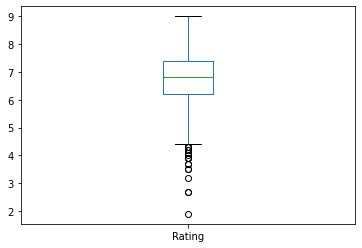

In [ ]:
movies_df['Rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>